# Visualizando con t-SNE

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Necesario para 3D
import buenas_practicas as mbp

In [73]:
sujeto = 1
prediccion = 'estimulo'
datos = mbp.DataSetEEG(sujeto)
datos.dejar_etiqueta(prediccion)

x = datos[:][0]
y = datos[:][1]

C:\Users\SantaFe-Tech\AppData\Local\Temp\ipykernel_960\979079098.py:21: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



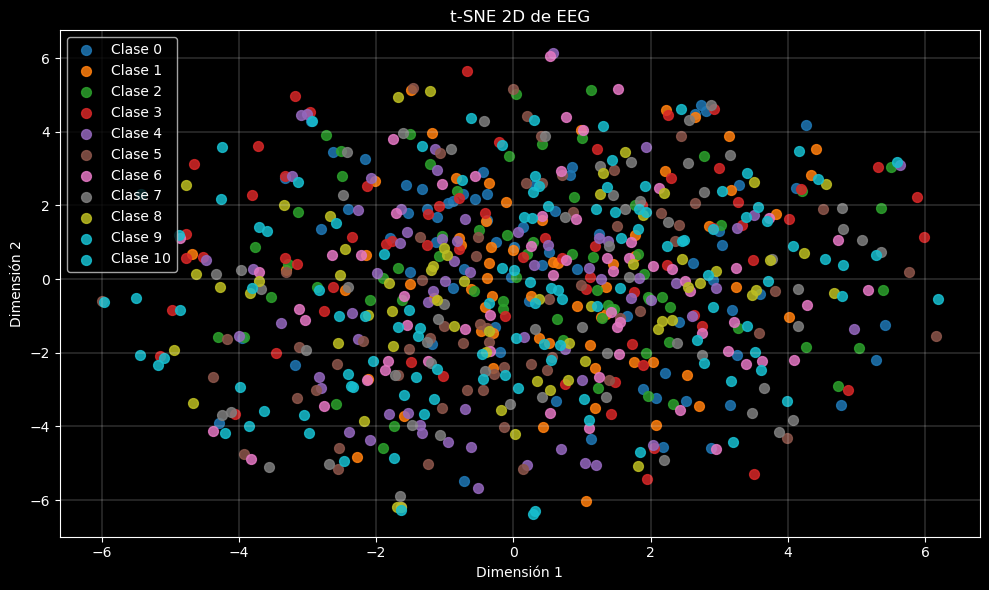

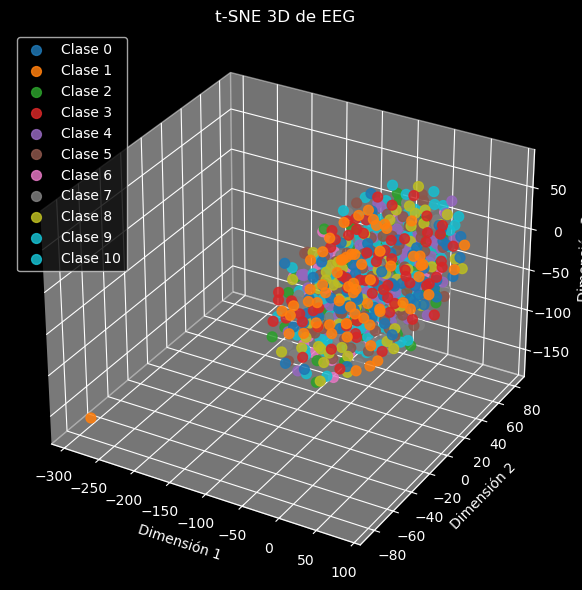

In [80]:
assert x.shape == (688, 24576)
assert y.shape == (688,)

# === 2. Escalar ===
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(x)

# === 3. t-SNE en 2D ===
perplexity2 = 30
tsne_2d = TSNE(n_components=2, perplexity=perplexity2, learning_rate='auto', init='pca')
eeg_tsne_2d = tsne_2d.fit_transform(eeg_scaled)

# === 4. t-SNE en 3D ===
perplexity3 = perplexity2
tsne_3d = TSNE(n_components=3, perplexity=perplexity3, learning_rate='auto', init='pca')
eeg_tsne_3d = tsne_3d.fit_transform(eeg_scaled)

# === 5. Visualización 2D ===
plt.figure(figsize=(10, 6))
classes = np.unique(y)
colors = plt.cm.get_cmap('tab10', len(classes))

for i, class_label in enumerate(classes):
    idx = y == class_label
    plt.scatter(
        eeg_tsne_2d[idx, 0], eeg_tsne_2d[idx, 1],
        label=f'Clase {class_label}',
        alpha=0.85,
        s=50,
        color=colors(i)
    )

plt.title('t-SNE 2D de EEG')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.grid(True, linewidth = 0.2)
plt.tight_layout()
plt.show()

# === 6. Visualización 3D ===
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for i, class_label in enumerate(classes):
    idx = y == class_label
    ax.scatter(
        eeg_tsne_3d[idx, 0], eeg_tsne_3d[idx, 1], eeg_tsne_3d[idx, 2],
        label=f'Clase {class_label}',
        alpha=0.85,
        s=50,
        color=colors(i)
    )

ax.set_title('t-SNE 3D de EEG')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_zlabel('Dimensión 3')
ax.legend()
plt.tight_layout()
plt.show()

Vemos que no se logran separar los grupos para ninguna de las etiquetas.

In [18]:
fs = 1024
tam_f = 33
ventana_temporal = 512
datos_stft = mifu.convertir_a_stft(datos_ordenados, fs, 'hann', ventana_temporal, ventana_temporal/2)
datos_stft[0] = datos_stft[0][:, :, :tam_f, :]

datos_aplanados = np.empty((datos_stft[0].shape[0], datos_stft[0].shape[1]*datos_stft[0].shape[2]*datos_stft[0].shape[3])).astype(np.complex128())
aux = np.empty((datos_stft[0].shape[0], datos_stft[0].shape[1], datos_stft[0].shape[2]*datos_stft[0].shape[3])).astype(np.complex128())
for i in range(datos_stft[0].shape[0]):
    for j in range(datos_stft[0].shape[1]):
        aux[i][j] = np.concatenate(datos_stft[0][i][j].T)
for i in range(aux.shape[0]):
    datos_aplanados[i] = np.concatenate(aux[i])
datos_aplanados = [datos_aplanados, datos_stft[1]]
datos_aplanados = [np.abs(datos_aplanados[0]), datos_aplanados[1]]

datos_normalizados1 = mifu.normalizar(datos_aplanados)

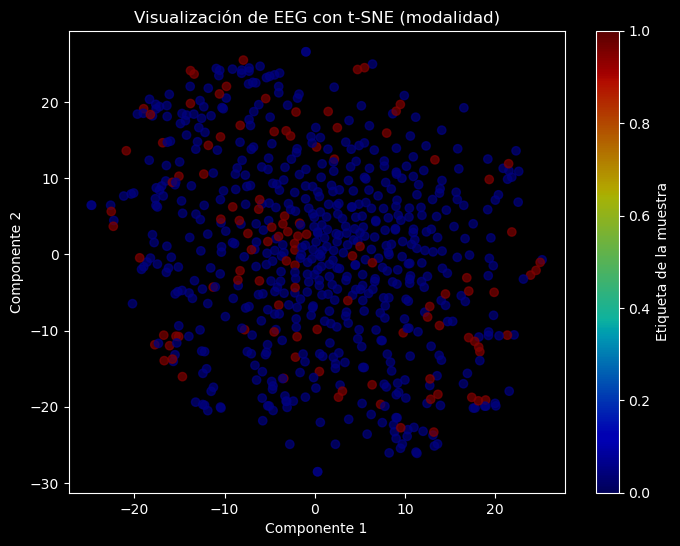

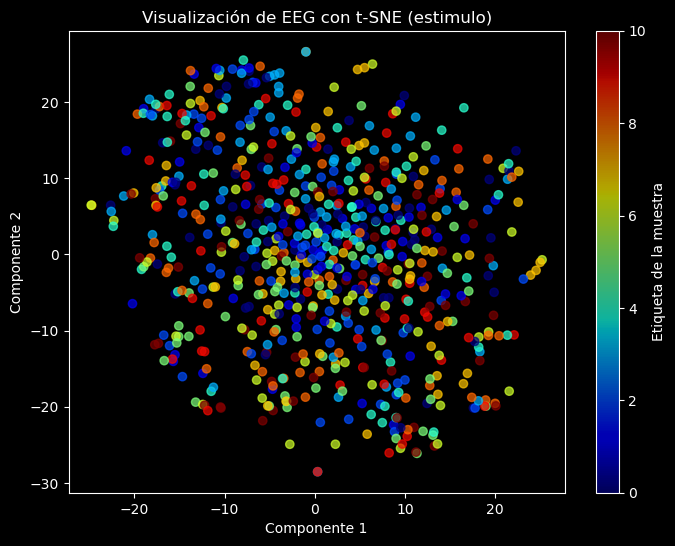

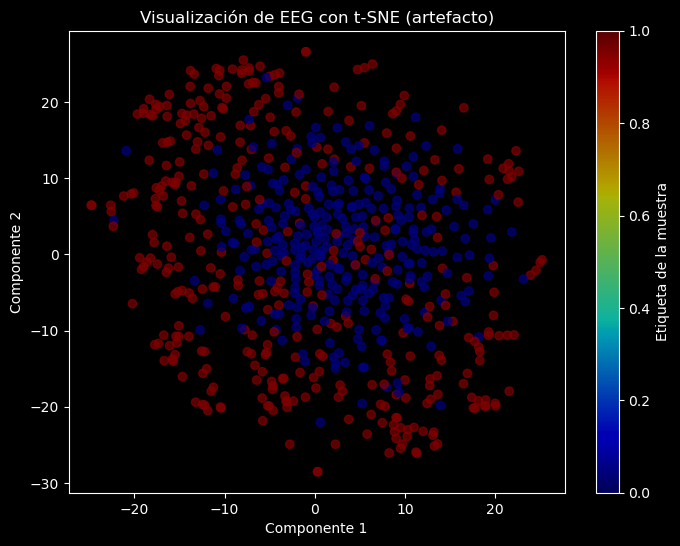

In [28]:
tsne = TSNE(n_components = 2, perplexity = 30, random_state = 17, learning_rate = 200, method = 'exact') # Ni cambiando el metodo al exacto se mejora la visualizacion
X_embedded1 = tsne.fit_transform(datos_normalizados1[0])

plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
scatter = plt.scatter(X_embedded1[:, 0], X_embedded1[:, 1], c = datos_normalizados1[1][:, 0] - 1, cmap = 'jet', alpha = 0.7)
plt.colorbar(label="Etiqueta de la muestra")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de EEG con t-SNE (modalidad)")
plt.show()

plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
scatter = plt.scatter(X_embedded1[:, 0], X_embedded1[:, 1], c = datos_normalizados1[1][:, 1] - 1, cmap = 'jet', alpha = 0.7)
plt.colorbar(label="Etiqueta de la muestra")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de EEG con t-SNE (estimulo)")
plt.show()

plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
scatter = plt.scatter(X_embedded1[:, 0], X_embedded1[:, 1], c = datos_normalizados1[1][:, 2] - 1, cmap = 'jet', alpha = 0.7)
plt.colorbar(label="Etiqueta de la muestra")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de EEG con t-SNE (artefacto)")
plt.show()

Hay una ligera mejora, mas que nada visible en modalidad y artefacto

# Pruebo PCA

In [71]:
sujeto = 1
prediccion = 'estimulo'
datos = mbp.DataSetEEG(sujeto)
datos.dejar_etiqueta(prediccion)

x = datos[:][0]
y = datos[:][1]

C:\Users\SantaFe-Tech\AppData\Local\Temp\ipykernel_960\1682394326.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



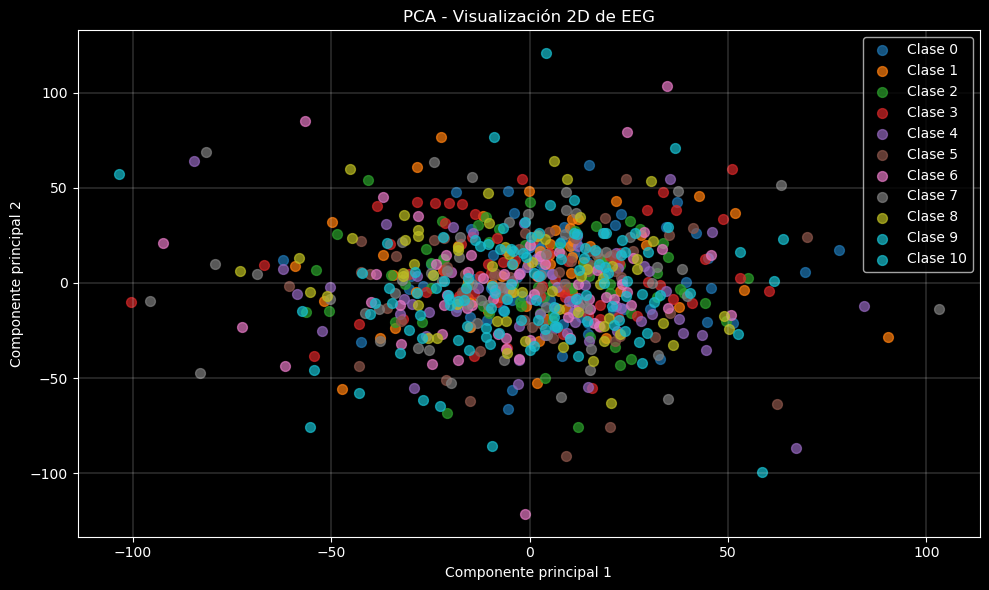

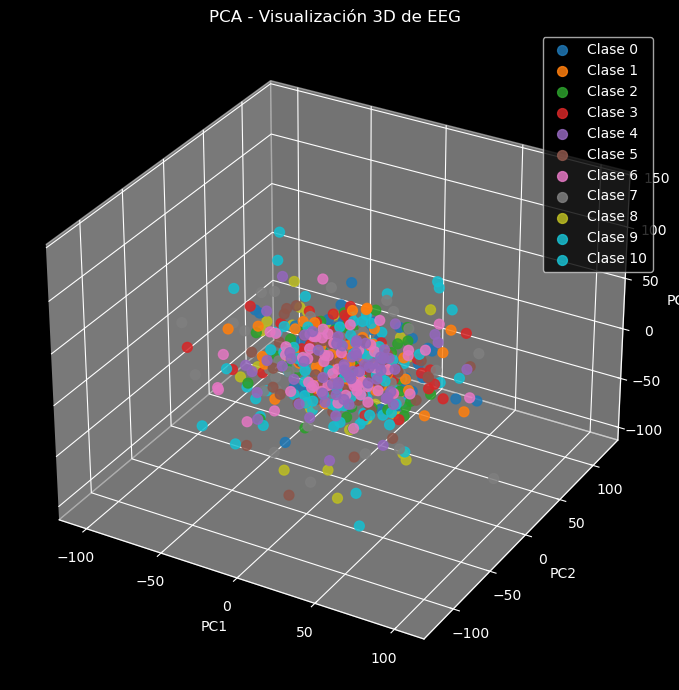

In [72]:
assert x.shape == (688, 24576)
assert y.shape == (688,)

# === 2. Escalar los datos ===
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(x)

# === 3. Aplicar PCA (a 3 componentes para usar tanto 2D como 3D) ===
pca = PCA(n_components = 3)
eeg_pca = pca.fit_transform(eeg_scaled)

# === 4. Visualización 2D ===
plt.figure(figsize=(10, 6))
classes = np.unique(y)
colors = plt.cm.get_cmap('tab10', len(classes))

for i, class_label in enumerate(classes):
    idx = y == class_label
    plt.scatter(
        eeg_pca[idx, 0], eeg_pca[idx, 1],
        label=f'Clase {class_label}',
        alpha=0.7,
        s=50,
        color=colors(i)
    )

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA - Visualización 2D de EEG')
plt.legend()
plt.grid(True, linewidth = 0.2)
plt.tight_layout()
plt.show()

# === 5. Visualización 3D ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, class_label in enumerate(classes):
    idx = y == class_label
    ax.scatter(
        eeg_pca[idx, 0], eeg_pca[idx, 1], eeg_pca[idx, 2],
        label=f'Clase {class_label}',
        alpha=0.85,
        s=50,
        color=colors(i)
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - Visualización 3D de EEG')
ax.legend()
plt.tight_layout()
plt.show()

# Combino PCA + tSNE

In [65]:
sujeto = 1
prediccion = 'artefacto'
datos = mbp.DataSetEEG(sujeto)
datos.dejar_etiqueta(prediccion)

x = datos[:][0]
y = datos[:][1]

Varianza explicada por las 100 componentes: 0.7836


C:\Users\SantaFe-Tech\AppData\Local\Temp\ipykernel_960\4091445613.py:26: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



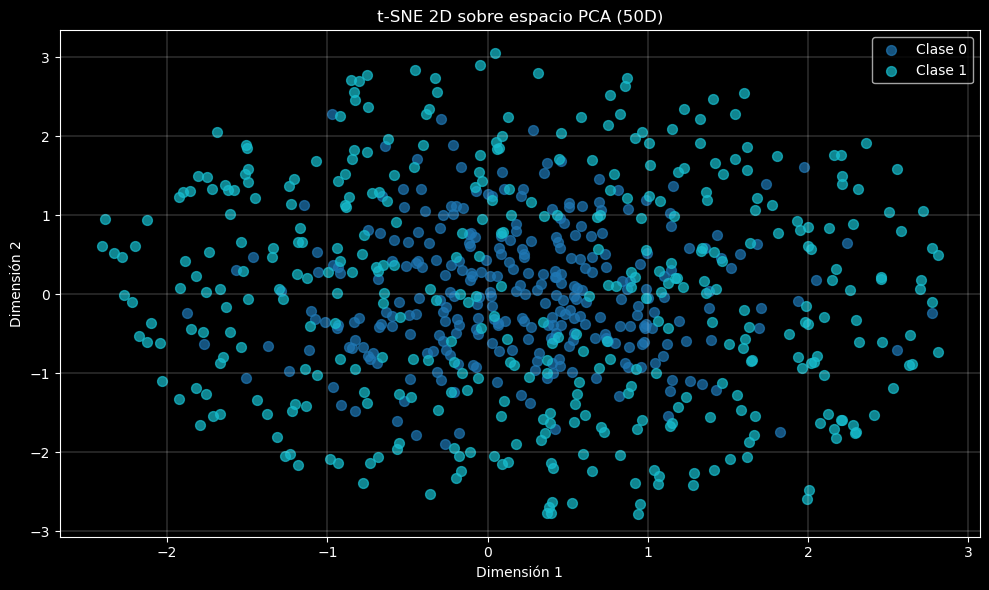

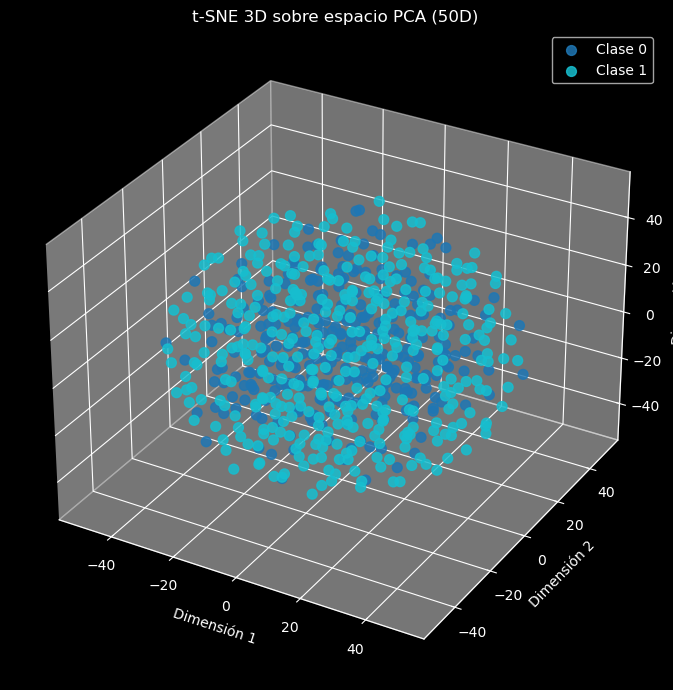

In [67]:
# === 1. Datos de entrada ===
# eeg_data: (688, 24576)
# labels:   (688,)
assert x.shape == (688, 24576)
assert y.shape == (688,)

# === 2. Escalar ===
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(x)

# === 3. PCA (reducción previa) ===
pca = PCA(n_components=100)
eeg_pca50 = pca.fit_transform(eeg_scaled)
print(f'Varianza explicada por las 100 componentes: {np.sum(pca.explained_variance_ratio_):.4f}')

# === 4. t-SNE sobre espacio PCA ===
tsne_2d = TSNE(n_components=2, perplexity=100, init='pca', learning_rate='auto', random_state=42)
eeg_tsne_2d = tsne_2d.fit_transform(eeg_pca50)

tsne_3d = TSNE(n_components=3, perplexity=100, init='pca', learning_rate='auto', random_state=42)
eeg_tsne_3d = tsne_3d.fit_transform(eeg_pca50)

# === 5. Visualización 2D ===
plt.figure(figsize=(10, 6))
classes = np.unique(y)
colors = plt.cm.get_cmap('tab10', len(classes))

for i, class_label in enumerate(classes):
    idx = y == class_label
    plt.scatter(
        eeg_tsne_2d[idx, 0], eeg_tsne_2d[idx, 1],
        label=f'Clase {class_label}',
        alpha=0.7,
        s=50,
        color=colors(i)
    )

plt.title('t-SNE 2D sobre espacio PCA (50D)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.grid(True, linewidth = 0.2)
plt.tight_layout()
plt.show()

# === 6. Visualización 3D ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, class_label in enumerate(classes):
    idx = y == class_label
    ax.scatter(
        eeg_tsne_3d[idx, 0], eeg_tsne_3d[idx, 1], eeg_tsne_3d[idx, 2],
        label=f'Clase {class_label}',
        alpha=0.85,
        s=50,
        color=colors(i)
    )

ax.set_title('t-SNE 3D sobre espacio PCA (50D)')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_zlabel('Dimensión 3')
ax.legend()
plt.tight_layout()
plt.show()

In [70]:
import plotly.express as px
import pandas as pd

sujeto = 1
prediccion = 'estimulo'
datos = mbp.DataSetEEG(sujeto)
datos.dejar_etiqueta(prediccion)
x = datos[:][0]
y = datos[:][1]

assert x.shape == (688, 24576)
assert y.shape == (688,)

# Escalado
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(x)

# Pre-reducción con PCA
pca = PCA(n_components=50)
eeg_pca50 = pca.fit_transform(eeg_scaled)

# t-SNE a 3D
tsne = TSNE(n_components=3, perplexity=5, init='pca',
            learning_rate='auto', random_state=42)
eeg_tsne_3d = tsne.fit_transform(eeg_pca50)

# === 2. Crear DataFrame para Plotly ===
df = pd.DataFrame({
    'TSNE-1': eeg_tsne_3d[:, 0],
    'TSNE-2': eeg_tsne_3d[:, 1],
    'TSNE-3': eeg_tsne_3d[:, 2],
    'Clase': y.numpy().astype(str)
})

# === 3. Visualización interactiva ===
fig = px.scatter_3d(
    df,
    x='TSNE-1', y='TSNE-2', z='TSNE-3',
    color='Clase',
    title='t-SNE 3D interactivo de EEG',
    labels={'TSNE-1':'Dimensión 1', 'TSNE-2':'Dimensión 2', 'TSNE-3':'Dimensión 3'},
    width=800, height=600
)
fig.update_traces(marker=dict(size=4, opacity=0.8))
import plotly.io as pio
pio.renderers.default = 'browser'
fig.show()